# 멀티클래스 분류 연습 (over 2진분류)
---
![iris_flower](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification-1024x367.png)

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
x.shape, y.shape # 데이터의 형태를 보고 코드화 시키면 되기 때문에 데이터의 형태를 확인한다.
# 좀 이상하다? x가 4개고 y가 하나이다. 연결주의 방식으로 표현을 하자면... 아래 그림과 같은데 우린 클래스가 3개임.
# 어떻게 접근해야 될까? 

((150, 4), (150,))

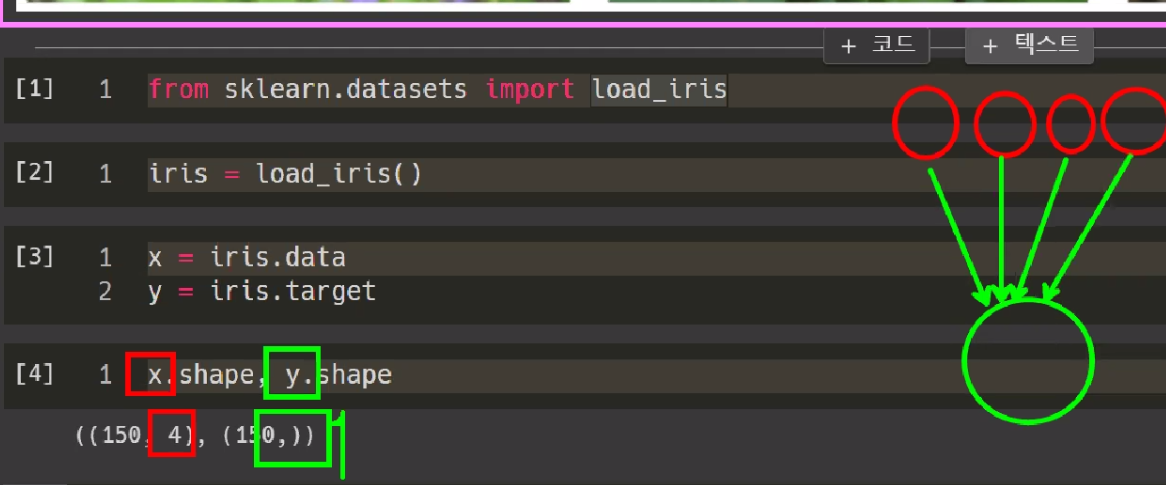

In [5]:
# y를 뜯어보자. 0이 쭈르륵, 1이 쭈르륵, 2가 쭈르륵 있다. 숫자이긴 하지만 꽃의 세부 품종(버지니카, 버지칼라, 세토사)이 이런 느낌을 가져가면 된다.
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

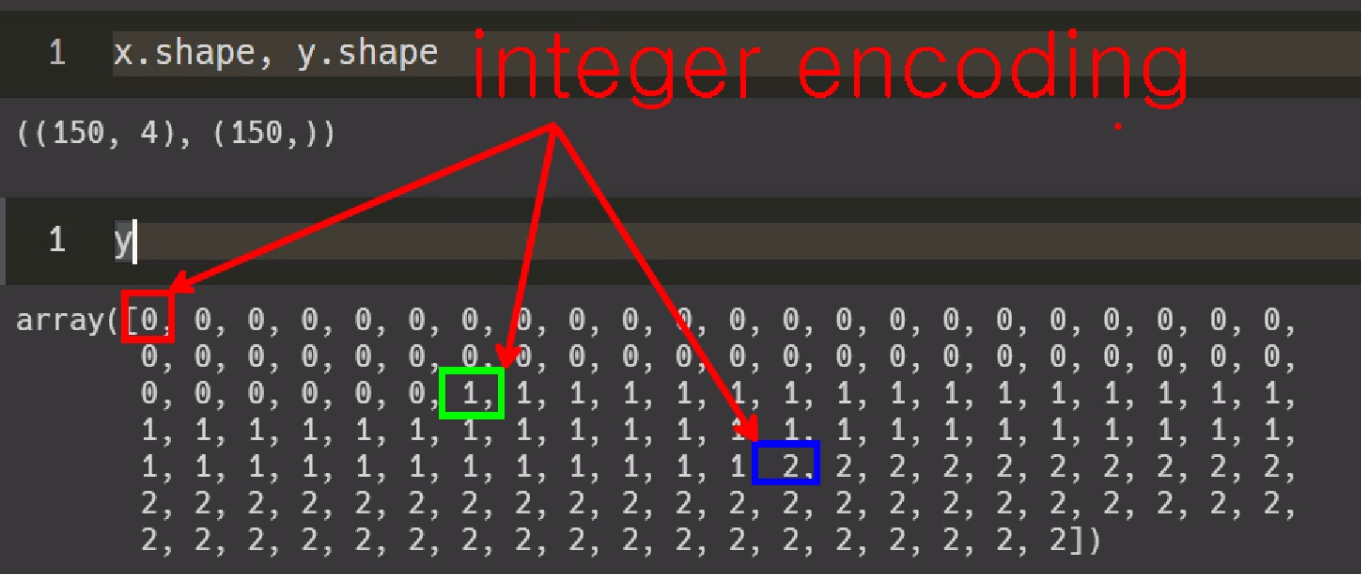

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

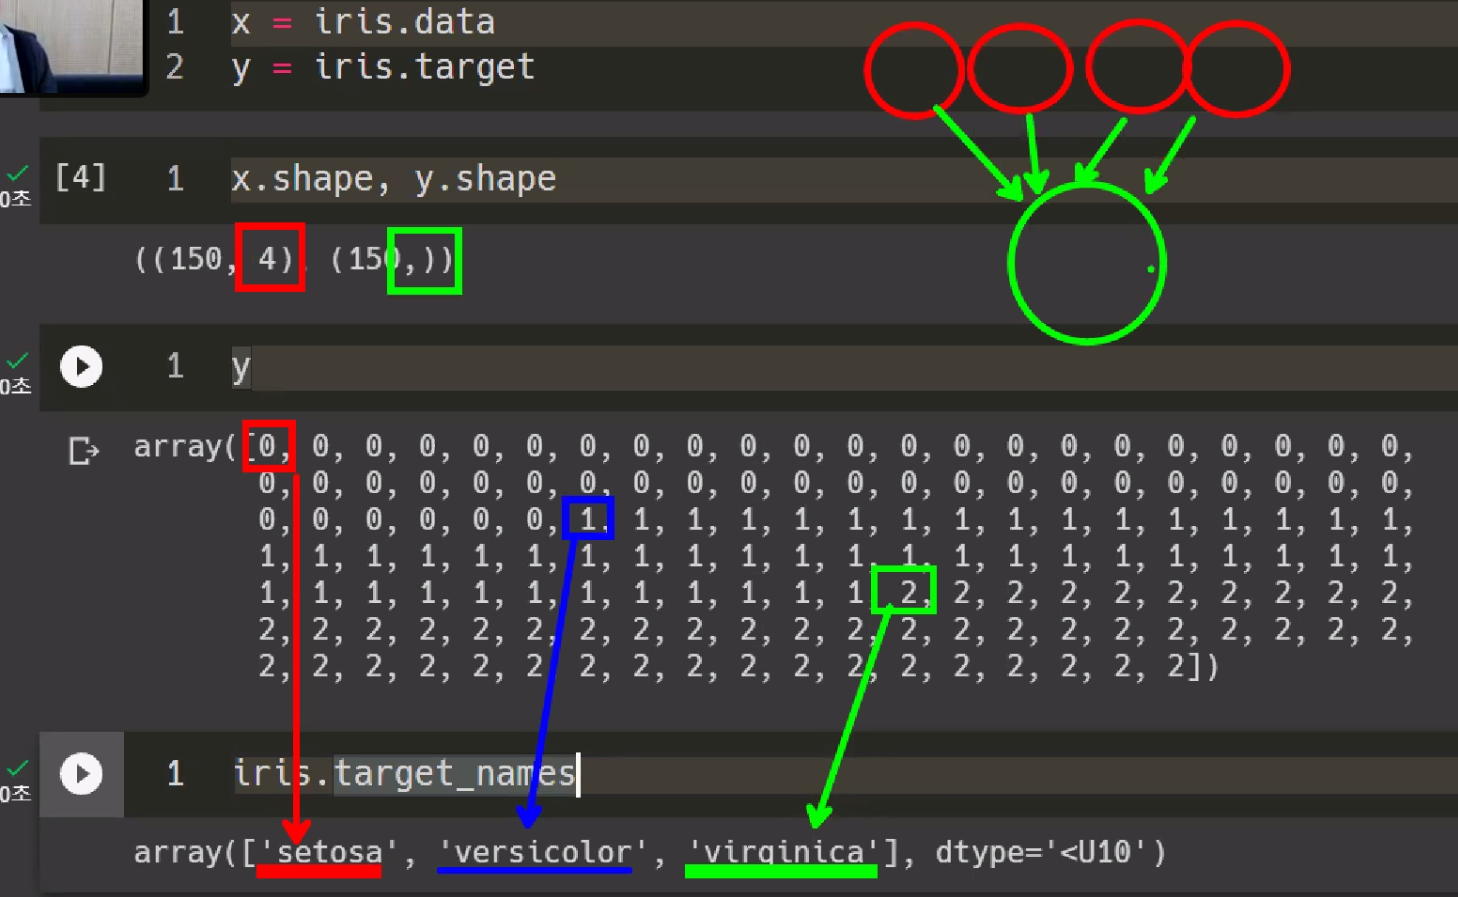

In [7]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical

In [8]:
y = to_categorical(y, 3)

In [9]:
x.shape, y.shape

((150, 4), (150, 3))

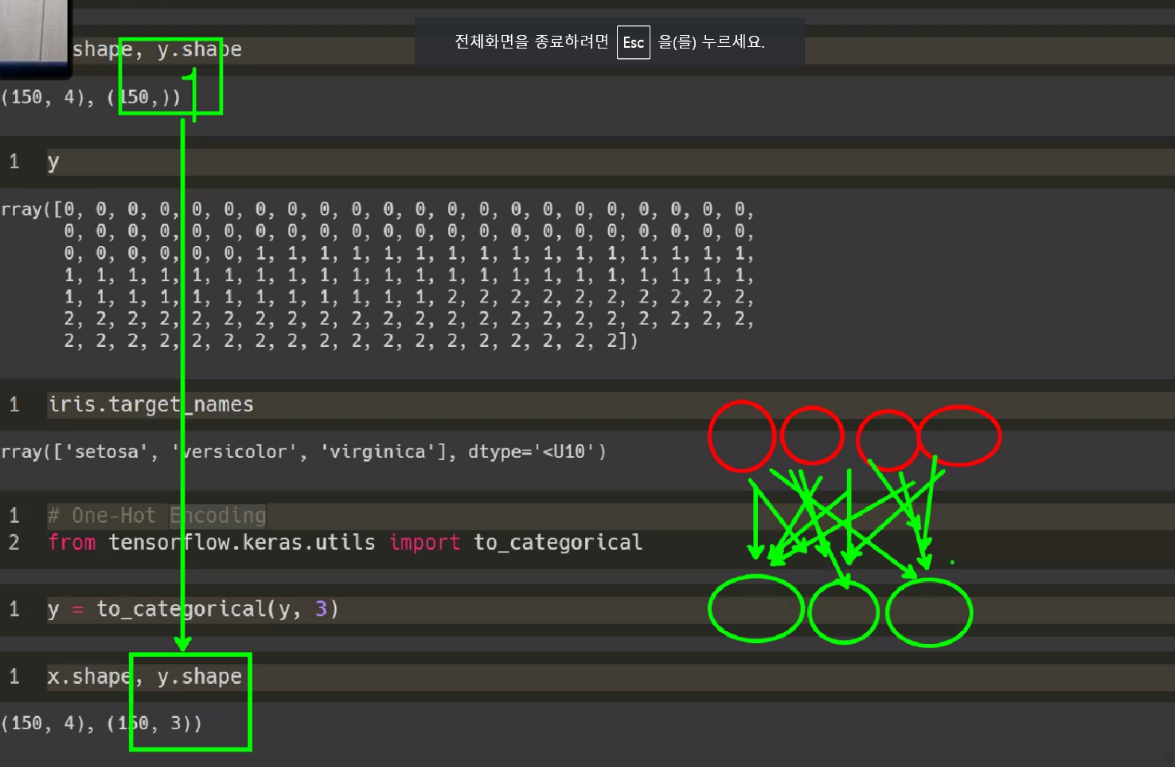

## 1번. Sequential API style로 모델링 하세요

- loss = 'categorical_crossentropy' 사용!

In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [16]:
## Sequential API 모델링 
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 레이어 선언
model = keras.models.Sequential()
# 3. 레이어 블록 조립
model.add( keras.layers.Input(shape=(4,)))
model.add( keras.layers.Dense(3, activation='softmax'))
# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

# 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


- 파람이 무엇일까? 노드와 관련되어있음.
- 이 선 하나하나가 가중치라고 말했었죠? 그럼 12개여야지 왜 15개야? 편향값이 추가되었기 때문이다. 그 다음 레이어의 노드들에 추가되었음.
- 아웃풋 레이어라고 말하지만 그 다음 레이어의 노드 수라고 말하는 것이 정확한 표현입니다. 이 화살표 하나하나가 값을 의미하는데,
- 빨간색 것들이 더해진 것 이외에도 초록색이라는 고정값? 우리가 만드려는 모델의 강건함을 만들기 위해서 
- 연결주의 관점에선 편향값을 일부러 써준다. 우리가 가지고 있는 데이터만으로 학습을 시킬 때 과적합이 발생할 수도 있고
- 우리가 가지고 있는 데이터로만 학습했을 때 좋은 성능이 일어날 수도 있다 >> 과적합을 풀어서 설명
- 우리 데이터 외에 또 다른 값을 줌으로써 모델의 학습을 일부러 흔들어요. 
- 빨간색 박스 값에 국한되어서가 아닌 다른 값들이 들어왔을 때도 좋은 성능을 발휘할 수 있도록 일부러 편향값을 넣는거지.
- activation을 거친 값이 0이더라도 바이어스를 거친 값이 아니 근데 바이어스가 뭐냐?
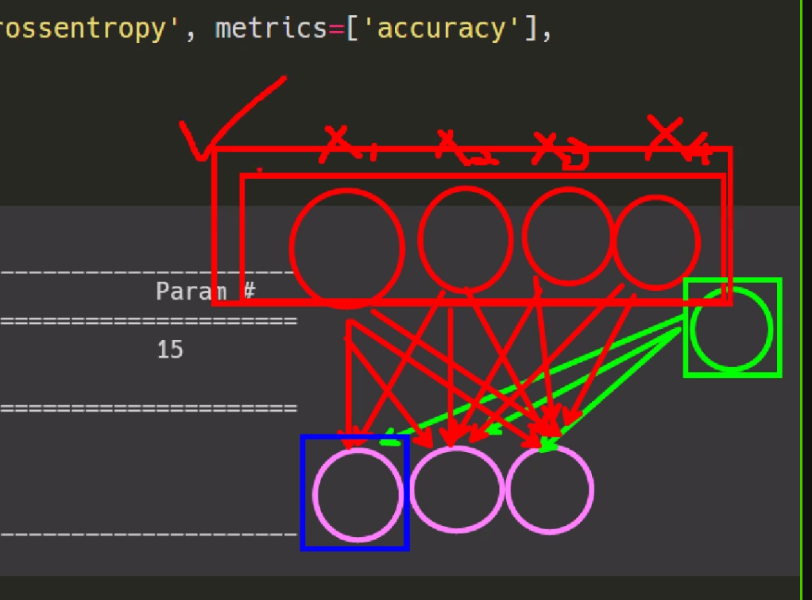

In [12]:
# 학습
model.fit(x, y, epochs = 10, verbose=1)

Epoch 1/10
5/5 [==============================] - 2s 3ms/step - loss: 4.0650 - accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 3.9589 - accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 3.8550 - accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 3.7488 - accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 3.6412 - accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 3.5427 - accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 3.4380 - accuracy: 0.3333
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 3.3388 - accuracy: 0.3333
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 3.2394 - accuracy: 0.3333
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 3.1428 - accuracy: 0.3333


- 에폭스 아래의 숫자 5/5가 뭘 의미하는 것인지?
- ?? 가 업데이트된 횟수 

In [13]:
# 예측값
y_pred = model.predict(x)

5/5 [==============================] - 0s 3ms/step


In [14]:
y_pred[:5]

array([[0.91264474, 0.08217493, 0.00518032],
       [0.91971254, 0.07409374, 0.00619365],
       [0.896011  , 0.09631487, 0.0076742 ],
       [0.87825084, 0.11321994, 0.0085291 ],
       [0.89760995, 0.09661137, 0.00577874]], dtype=float32)

In [15]:
y[:5]
# 전부 다 베지컬러라고 예측하고 있음. 우리 모델의 성능이 별로 안 좋은 것 같다...

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

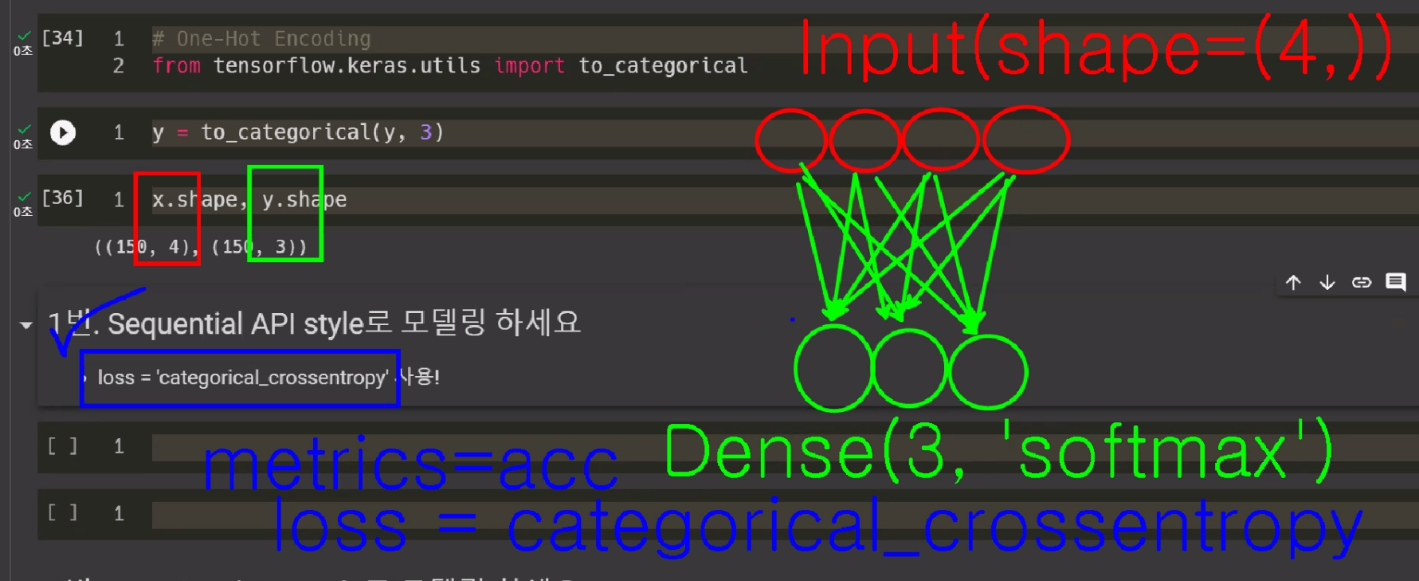

## 2번. Functional API style로 모델링 하세요

In [ ]:
x.shape, y.shape